In [1]:
import numpy as np
import pandas as pd

## 映画情報の読み込み

In [3]:
# 映画の情報の読み込み
m_cols = ["movie_id", "title", "genre"]
movies = pd.read_csv(
    "../data/ml-10M100K/movies.dat",
    sep="::", encoding="latin-1", engine="python",
    names=m_cols)
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## データの整形

In [4]:
movies["genre"] = movies["genre"].map(
    lambda x: x.split("|"))
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


## 映画情報の基本的な統計量を確認する

In [5]:
len(movies)

10681

In [6]:
movies["title"].nunique()

10680

In [7]:
movies[movies["title"].duplicated()]

,movie_id,title,genre
10668,64997,War of the Worlds (2005),[Action]


In [9]:
all_genre = set()
for genre in movies["genre"].values:
    all_genre.update(genre)
    
all_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [10]:
movies["genre"].map(len).value_counts()

1    4006
2    3702
3    2005
4     744
5     186
6      34
7       3
8       1
Name: genre, dtype: int64

## タグ情報の読み込み

In [11]:
t_cols = ["user_id", "movie_id", "tag", "timestamp"]
user_tagged_movies = pd.read_csv(
    "../data/ml-10M100K/tags.dat",
    names=t_cols, sep="::", engine="python")
user_tagged_movies["tag"] = user_tagged_movies["tag"].str.lower()
user_tagged_movies.head()

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


## タグ情報の統計量を見てみる

In [12]:
user_tagged_movies["tag"].nunique()

15240

In [13]:
len(user_tagged_movies)

95580

In [14]:
user_tagged_movies["movie_id"].nunique()

7601

In [15]:
user_tagged_movies["user_id"].nunique()

4009

## 映画情報にタグ情報を結合する

In [16]:
movie_tags = user_tagged_movies.groupby("movie_id").agg({"tag": list})
movies = movies.merge(movie_tags, on="movie_id", how="left")
movies.head()

,movie_id,title,genre,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[pixar, pixar, pixar, animation, pixar, animat..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[for children, game, animals, joe johnston, ro..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[funniest movies, comedinha de velhinhos engra..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",[girl movie]
4,5,Father of the Bride Part II (1995),[Comedy],"[steve martin, pregnancy, remake, steve martin..."


## 評価値データを読み込む

In [17]:
r_cols = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_csv(
    "../data/ml-10M100K/ratings.dat",
    names=r_cols, sep="::", engine="python")
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [18]:
len(ratings)

10000054

In [19]:
ratings["user_id"].nunique()

69878

In [20]:
ratings["movie_id"].nunique()

10677

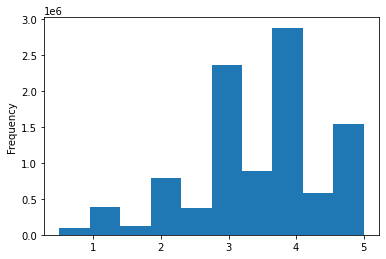

In [21]:
ratings["rating"].plot.hist();

## 評価値のデータ数が多いので利用データを絞る

In [22]:
valid_user_ids = sorted(ratings["user_id"].unique())[:1000]
rating = ratings[ratings["user_id"].isin(valid_user_ids)]

In [23]:
movielens = ratings.merge(movies, on="movie_id")
movielens.head()

,user_id,movie_id,rating,timestamp,title,genre,tag
0,1,122,5.0,838985046,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
1,139,122,3.0,974302621,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
2,149,122,2.5,1112342322,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
3,182,122,3.0,943458784,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."
4,215,122,4.5,1102493547,Boomerang (1992),"[Comedy, Romance]","[dating, nudity (topless - brief), can't remem..."


In [24]:
movielens.groupby("user_id").agg({
    "movie_id": len
}).agg({
    "movie_id": [min, max, np.mean, len]
})

,movie_id
min,20.00000
max,7359.00000
mean,143.10733
len,69878.00000


In [25]:
movielens.groupby("movie_id").agg({
    "user_id": len
}).agg({
    "user_id": [min, max, np.mean, len]
})

,user_id
min,1.000000
max,34864.000000
mean,936.597733
len,10677.000000


In [26]:
len(movielens)

10000054

In [27]:
movielens.groupby("rating").agg({"movie_id": len})

,movie_id
rating,
0.5,94988
1.0,384180
1.5,118278
2.0,790306
2.5,370178
3.0,2356676
3.5,879764
4.0,2875850
4.5,585022
